# <center>**Análise Exploratória e Descritiva - IMDB**</center>

---

* Matheus Gabriel Alves Nobre - 12558398

* Pedro Luis Silverio Navarro - 12558144

* Rafael Batista Pereira - 12610462

Universidade de São Paulo, São Carlos, Brasil.

---

## Carregando pacotes e definindo funções

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set_theme(style="white", palette="pastel")
#sns.set_theme(style="whitegrid", palette="pastel")
plt.style.use("fivethirtyeight")

In [ ]:
class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

In [ ]:
def plot_trend(column_name, ylabel, title):
    # Group data by release year and calculate the average for the column
    yearly_avg = data.groupby('Released_Year')[column_name].mean()

    # Create a line plot to visualize the trend
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_avg.index, yearly_avg.values, marker='o', label=f'Average {column_name}')
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)

    # Calculate the trendline (linear regression)
    z = np.polyfit(yearly_avg.index, yearly_avg.values, 1)
    p = np.poly1d(z)

    # Plot the trendline
    plt.plot(yearly_avg.index, p(yearly_avg.index), "r--", label='Trendline')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

In [ ]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

## Carregando os dados
###`Top 1000 Movies by IMDB Rating`

**Introdução ao Conjunto de Dados**: O conjunto de dados "Top 1000 Movies by IMDB Rating" oferece uma visão profunda do universo do cinema e da televisão. Ele abrange informações abrangentes sobre filmes e programas de TV, incluindo títulos, anos de lançamento, classificações no IMDB, gêneros, diretores, elencos, votos, e ganhos. Esse conjunto de dados é uma rica fonte de informações para entender o que faz uma produção audiovisual ser bem-sucedida e como fatores como gênero, direção e classificações impactam seu desempenho. Esses dados podem ser utilizados em diversos contextos, tais como:

1. **Análise do Desempenho Cinematográfico e Televisivo**: Este conjunto de dados permite a avaliação de tendências ao longo do tempo, destacando como as classificações e receitas brutas de filmes e programas de TV evoluíram. Isso pode ser útil para estudos sobre a indústria de entretenimento.

2. **Exploração de Gêneros**: A informação sobre gêneros permite investigar quais categorias de filmes e programas de TV são mais predominantes e se essas categorias têm alguma correlação com classificações ou receitas mais elevadas.

3. **Avaliação do Impacto dos Diretores**: Ao analisar os diretores responsáveis por essas produções, é possível identificar quais deles se destacam e têm um impacto significativo no sucesso de seus filmes ou programas de TV.

Carregando os dados do GitHub.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/RafaelBP07/Dados/main/imdb_top_1000.csv")
data.iloc[:]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


Significado das variáveis:
* **`Poster_Link`**: Link do pôster usado pelo IMDb.
* **`Series_Title`**: Nome do filme.
* **`Released_Year`**: Ano de lançamento do filme.
* **`Certificate`**: Certificado/Classificação obtido pelo filme.
* **`Runtime`**: Duração total do filme.
* **`Genre`**: Gênero do filme.
* **`IMDB_Rating`**: Avaliação do filme no site IMDb.
* **`Overview`**: Resumo da história.
* **`Meta_score`**: Pontuação obtida pelo filme.
* **`Director`**: Nome do diretor.
* **`Star1, Star2, Star3, Star4`**: Nomes das estrelas do filme.
* **`No_of_votes`**: Número total de votos.
* **`Gross`**: Dinheiro arrecadado pelo filme.

Classes de `Certificate`:

* **A**: "A" representa "Adulto" e geralmente indica que o conteúdo é destinado apenas para adultos. Pode conter temas explícitos ou maduros e não é adequado para crianças.

* **UA**: "UA" significa "Adulto Sem Restrições", o que significa que o conteúdo é adequado para todos os adultos. Pode conter temas adultos leves ou moderados, mas não é tão restritivo quanto "A".

* **U**: "U" significa "Universal" e indica que o conteúdo é adequado para todas as audiências, incluindo crianças. Geralmente é usado para conteúdo adequado para a família.

* **PG-13**: "PG-13" significa "Orientação dos Pais 13" e significa que algum material pode ser inadequado para crianças menores de 13 anos. Os pais são incentivados a fornecer orientação ao assistir com espectadores mais jovens.

* **R**: "R" indica que o conteúdo é restrito e destinado a adultos ou espectadores com mais de uma certa idade (geralmente 17 ou 18 anos). Pode conter linguagem forte, violência ou conteúdo explícito.

* **Unrated**: "Unrated" significa que o conteúdo não foi oficialmente classificado por um conselho ou organização de classificação de conteúdo. Frequentemente sugere que o conteúdo pode não ser adequado para todas as audiências.

* **PG**: "PG" significa "Orientação dos Pais" e significa que algum material pode não ser adequado para crianças. Os pais são incentivados a fornecer orientação ao assistir com espectadores mais jovens.

* **G**: "G" significa "Geral" e indica que o conteúdo é adequado para todas as audiências, incluindo crianças. É semelhante a "U".

* **Passed**: "Passed" é uma classificação usada em filmes mais antigos, indicando que o filme foi aprovado para todas as audiências.

* **TV-14**: "TV-14" é uma classificação de conteúdo usada para programas de televisão, indicando que o programa pode não ser adequado para crianças menores de 14 anos sem orientação dos pais. Pode conter temas intensos ou maduros.

* **16**: Esta classificação não é tão comum e pode variar de acordo com a região. Provavelmente indica que o conteúdo é adequado para espectadores com 16 anos ou mais.

* **TV-MA**: "TV-MA" é uma classificação de conteúdo usada para programas de televisão e significa "Audiências Maduras". É destinado a adultos e pode conter linguagem forte, conteúdo sexual ou violência gráfica.

* **GP**: "GP" significa "Patronato Geral" e era uma classificação usada em filmes mais antigos. Indicava que o filme era adequado para todas as audiências, mas exigia orientação dos pais para crianças.

* **Approved**: "Approved" é outra classificação usada em filmes mais antigos, indicando que o filme foi aprovado para todas as audiências.

* **TV-PG**: "TV-PG" é uma classificação de conteúdo usada para programas de televisão, indicando que o programa pode conter material que os pais considerariam inadequado para crianças mais jovens.

* **U/A**: "U/A" significa "Universal/Adulto" e indica que o conteúdo é adequado para todas as audiências com orientação dos pais. É uma classificação de conteúdo comum no cinema indiano.

Sugestões de análises(**kaggle**):
1. Análise da arrecadação de um filme em relação aos diretores.
2. Análise da arrecadação de um filme em relação a diferentes estrelas.
3. Análise do número de votos de um filme em relação aos diretores.
4. Análise do número de votos de um filme em relação a diferentes estrelas.
5. Qual ator prefere qual gênero?
6. Qual combinação de atores está obtendo a melhor avaliação no IMDb com mais frequência?
7. Qual combinação de atores está obtendo uma boa arrecadação?

**Fonte: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows**

## Obtendo informações básicas dos dados

Com informações básicas dos dados, podemos identificar problemas relacionados às variáveis, como formatação incorreta, valores ausentes e outros problemas potenciais.

In [ ]:
print(f"Número de Linhas: {data.shape[0]} \nNúmero de Colunas: {data.shape[1]}")

Número de Linhas: 1000 
Número de Colunas: 16


In [ ]:
print(f"Nome das Colunas: {', '.join(data.columns)}")

Nome das Colunas: Poster_Link, Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Overview, Meta_score, Director, Star1, Star2, Star3, Star4, No_of_Votes, Gross


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [ ]:
data.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:
print(f"Linhas duplicadas: {sum(data.duplicated())}")

Linhas duplicadas: 0


In [ ]:
data.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

Mediante uma análise preliminar, identificamos alguns procedimentos a serem executados:

* Avaliar e tratar os dados ausentes.
* Realizar transformações necessárias em algumas variáveis.
* Identificar e remover colunas desnecessárias do conjunto de dados.

## Pré-processamento

### Removendo Colunas
* `Poster_Link`
* `Overview`

Identificamos algumas variáveis que optamos por remover do conjunto de dados, e cada uma delas tem motivos específicos para a exclusão. Vamos detalhar esses motivos a seguir:

1. **`Poster_Link`**: Optamos por remover esta variável, pois o link para o pôster do filme não é relevante para análises ou modelagem estatística.

2. **`Overview`**: A coluna foi excluída devido à natureza textual e subjetiva das sinopses dos filmes. Analisar e processar essas descrições exigiria técnicas de processamento de linguagem natural(NLP), que estão além do escopo do nosso projeto atual.

Isso nos permite focar em variáveis mais pertinentes e viáveis para as tarefas em questão.

In [ ]:
#data = data.drop("Poster_Link", axis=1)
data.drop(['Poster_Link','Overview'], axis=1, inplace=True)

Após a remoção dessas colunas, nosso DataFrame resultante é o seguinte:

In [ ]:
data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### Tratando dados faltantes
* `Certificate`
* `Meta_score`
* `Gross` (transformação inclusa)

Como a variável `Certificate` é categórica, procederemos à identificação das categorias existentes nela.

In [ ]:
pd.DataFrame(data["Certificate"].value_counts().reset_index()).rename(columns={"index": "Certificate", "Certificate": "Count"})

,Certificate,Count
0,U,234
1,A,197
2,UA,175
3,R,146
4,PG-13,43
5,PG,37
6,Passed,34
7,G,12
8,Approved,11
9,TV-PG,3


Observamos a presença da categoria `Unrated` e decidimos atribuí-la aos valores ausentes.

In [ ]:
data['Certificate'] = data['Certificate'].fillna('Unrated')
pd.DataFrame(data["Certificate"].value_counts().reset_index()).rename(columns={"index": "Certificate", "Certificate": "Count"})

,Certificate,Count
0,U,234
1,A,197
2,UA,175
3,R,146
4,Unrated,102
5,PG-13,43
6,PG,37
7,Passed,34
8,G,12
9,Approved,11


Antes de analisar as variáveis `Meta_Score` e `Gross`, realizamos uma transformação na variável `Gross`, convertendo-a em formato de número decimal (float).

In [ ]:
data['Gross'] = data['Gross'].str.replace(',', '', regex=True).astype(float)

Após essa transformação, estamos prontos para criar visualizações, como
 istogramas e boxplots, para cada uma dessas variáveis.

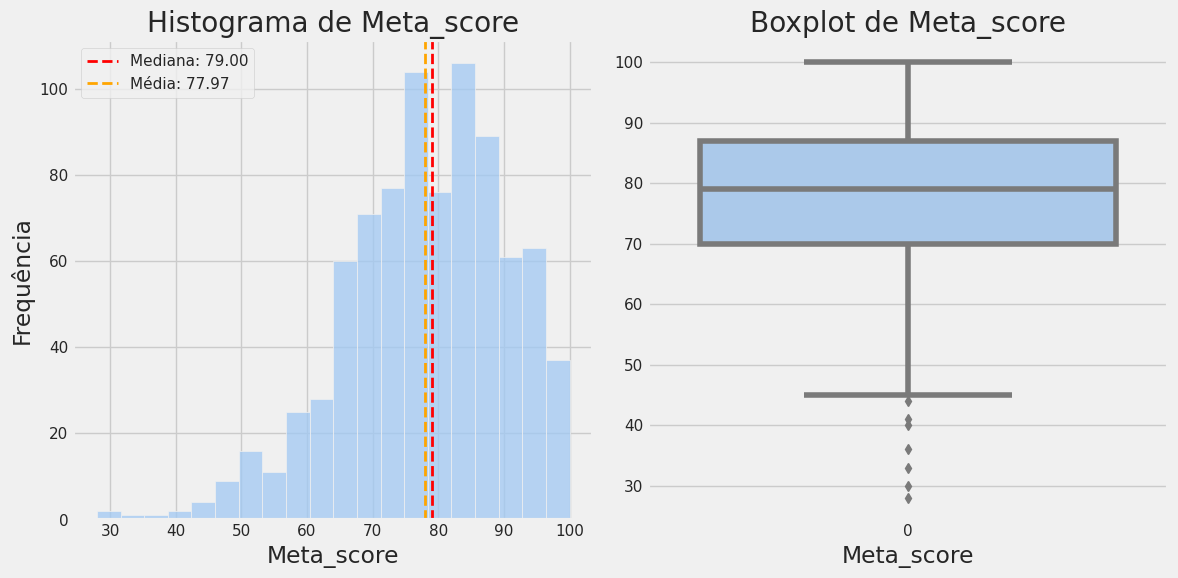

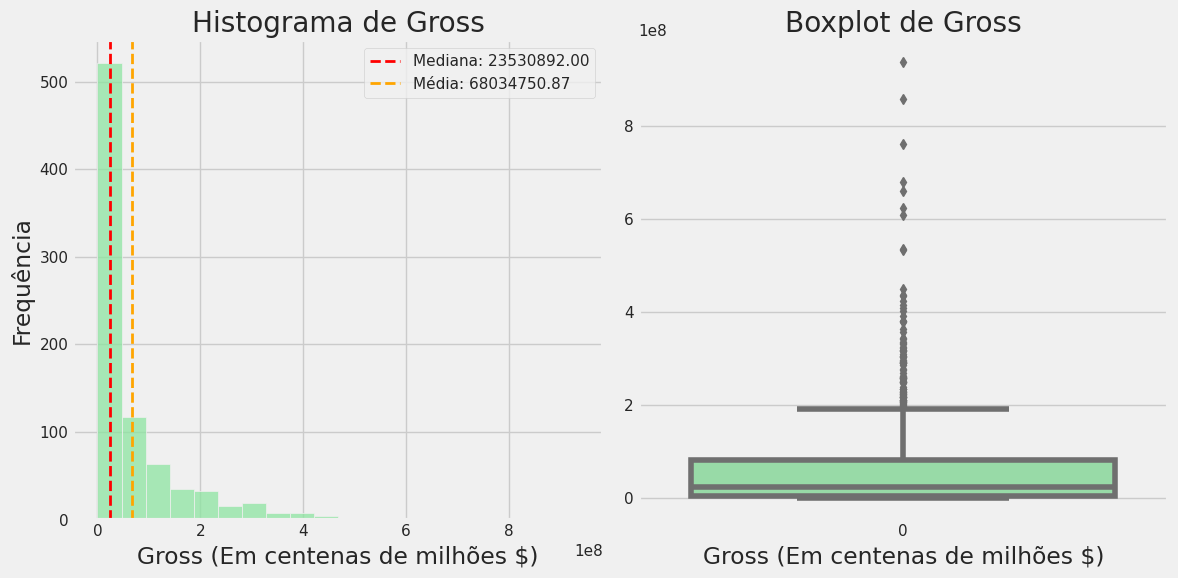

In [ ]:
plt.figure(figsize=(12, 6))

# Histograma para Meta_score
plt.subplot(1, 2, 1)
sns.histplot(data['Meta_score'], bins=20, color = sns.color_palette("pastel")[0])
plt.axvline(data['Meta_score'].median(),  color='red', linestyle='dashed', linewidth=2, label=f'Mediana: {data["Meta_score"].median():.2f}')
plt.axvline(data['Meta_score'].mean(),  color='orange', linestyle='dashed', linewidth=2, label=f'Média: {data["Meta_score"].mean():.2f}')
plt.title('Histograma de Meta_score')
plt.xlabel('Meta_score')
plt.ylabel('Frequência')
plt.legend()

# Boxplot para Meta_score
plt.subplot(1, 2, 2)
sns.boxplot(data['Meta_score'], color = sns.color_palette("pastel")[0])
plt.title('Boxplot de Meta_score')
plt.xlabel('Meta_score')

plt.tight_layout()  # Garante que os gráficos não se sobreponham
plt.show()

plt.figure(figsize=(12, 6))

# Histograma para Gross
plt.subplot(1, 2, 1)
sns.histplot(data['Gross'], bins=20, color = sns.color_palette("pastel")[2])
plt.axvline(data['Gross'].median(), color='red', linestyle='dashed', linewidth=2, label=f'Mediana: {data["Gross"].median():.2f}')
plt.axvline(data['Gross'].mean(), color='orange', linestyle='dashed', linewidth=2, label=f'Média: {data["Gross"].mean():.2f}')
plt.title('Histograma de Gross')
plt.xlabel('Gross (Em centenas de milhões $)')
plt.ylabel('Frequência')
plt.legend()

# Boxplot para Gross
plt.subplot(1, 2, 2)
sns.boxplot(data['Gross'], color = sns.color_palette("pastel")[2])
plt.title('Boxplot de Gross')
plt.xlabel('Gross (Em centenas de milhões $)')

plt.tight_layout()  # Garante que os gráficos não se sobreponham
plt.show()

Devido à considerável presença de valores discrepantes(outliers) e a distribuição assimétrica, optamos por utilizar a mediana em vez da média para preencher os valores faltantes nessas variáveis.

In [ ]:
# Calcula as medianas das colunas
median_meta_score = data['Meta_score'].median()
median_gross = data['Gross'].median()

# Preenche os valores faltantes com as medianas correspondentes
data['Meta_score'].fillna(median_meta_score, inplace=True)
data['Gross'].fillna(median_gross, inplace=True)

Após esse processo, podemos recriar as visualizações das variáveis após o tratamento.

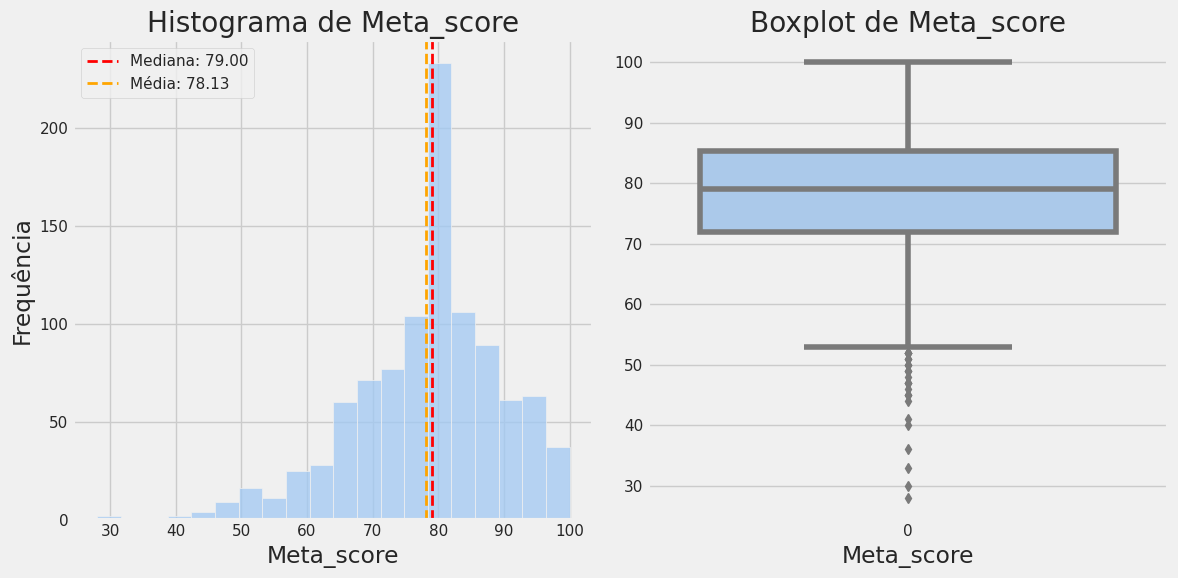

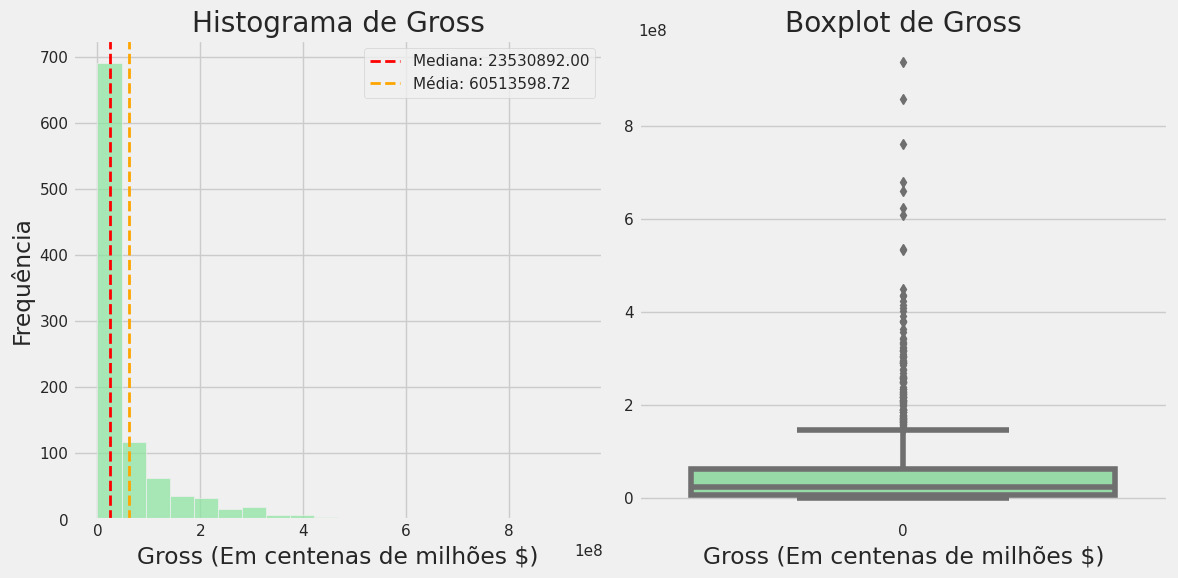

In [ ]:
plt.figure(figsize=(12, 6))

# Histograma para Meta_score
plt.subplot(1, 2, 1)
sns.histplot(data['Meta_score'], bins=20, color = sns.color_palette("pastel")[0])
plt.axvline(data['Meta_score'].median(), color='red', linestyle='dashed', linewidth=2, label=f'Mediana: {data["Meta_score"].median():.2f}')
plt.axvline(data['Meta_score'].mean(), color='orange', linestyle='dashed', linewidth=2, label=f'Média: {data["Meta_score"].mean():.2f}')
plt.title('Histograma de Meta_score')
plt.xlabel('Meta_score')
plt.ylabel('Frequência')
plt.legend()

# Boxplot para Meta_score
plt.subplot(1, 2, 2)
sns.boxplot(data['Meta_score'], color = sns.color_palette("pastel")[0])
plt.title('Boxplot de Meta_score')
plt.xlabel('Meta_score')

plt.tight_layout()  # Garante que os gráficos não se sobreponham
plt.show()

plt.figure(figsize=(12, 6))

# Histograma para Gross
plt.subplot(1, 2, 1)
sns.histplot(data['Gross'], bins=20, color = sns.color_palette("pastel")[2])
plt.axvline(data['Gross'].median(), color='red', linestyle='dashed', linewidth=2, label=f'Mediana: {data["Gross"].median():.2f}')
plt.axvline(data['Gross'].mean(), color='orange', linestyle='dashed', linewidth=2, label=f'Média: {data["Gross"].mean():.2f}')
plt.title('Histograma de Gross')
plt.xlabel('Gross (Em centenas de milhões $)')
plt.ylabel('Frequência')
plt.legend()

# Boxplot para Gross
plt.subplot(1, 2, 2)
sns.boxplot(data['Gross'], color = sns.color_palette("pastel")[2])
plt.title('Boxplot de Gross')
plt.xlabel('Gross (Em centenas de milhões $)')

plt.tight_layout()  # Garante que os gráficos não se sobreponham
plt.show()

Após o tratamento, parece que tudo está em conformidade e pronto para prosseguir com o pré-processamento, podemos verificar se ainda existem dados faltantes.

In [ ]:
data.isna().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

### Transformando variáveis
* `Released_Year`
* `Runtime`

Antes de realizar a transformação em `Released_Year`, realizaremos uma análise rápida das categorias presentes nesta variável.

In [ ]:
data["Released_Year"].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

É possível observar a presença de uma classe definida como "PG", cujo significado não é conhecido. Portanto, vamos analisar as outras informações associadas a essa observação.

In [ ]:
data[data['Released_Year'] == 'PG']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


Sabendo que se refere ao filme "Apollo 13", realizamos uma breve pesquisa no site oficial do IMDb para encontrar o ano de lançamento deste filme. Após encontrar a informação, atualizamos os dados, em seguida, convertemos a variável `Released_Year` para o formato inteiro (int) e procedemos a uma breve visualização em uma tabela.

In [ ]:
data.loc[data['Released_Year'] == 'PG', 'Released_Year'] = '1995' # Fonte: https://www.imdb.com/title/tt0112384/
data['Released_Year'] = data['Released_Year'].astype(int)

pd.DataFrame(data["Released_Year"].value_counts().reset_index()).rename(columns={"index": "Released_Year", "Released_Year": "Count"})

,Released_Year,Count
0,2014,32
1,2004,31
2,2009,29
3,2013,28
4,2016,28
...,...,...
94,1930,1
95,1921,1
96,1936,1
97,1922,1


Antes de realizar a transformação na variável `Runtime`, é importante examinar quais classes compõem essa variável.

In [ ]:
data["Runtime"].unique()

array(['142 min', '175 min', '152 min', '202 min', '96 min', '201 min',
       '154 min', '195 min', '148 min', '139 min', '178 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '160 min',
       '132 min', '153 min', '169 min', '130 min', '125 min', '189 min',
       '116 min', '127 min', '118 min', '121 min', '207 min', '122 min',
       '106 min', '112 min', '151 min', '150 min', '155 min', '119 min',
       '110 min', '88 min', '137 min', '89 min', '165 min', '109 min',
       '102 min', '87 min', '126 min', '147 min', '117 min', '181 min',
       '149 min', '105 min', '164 min', '170 min', '98 min', '101 min',
       '113 min', '134 min', '229 min', '115 min', '143 min', '95 min',
       '104 min', '123 min', '131 min', '108 min', '81 min', '99 min',
       '114 min', '129 min', '228 min', '128 min', '103 min', '107 min',
       '68 min', '138 min', '156 min', '167 min', '163 min', '186 min',
       '321 min', '135 min', '140 min', '180 min', '158 min'

Aparentemente, não há valores incorretos na variável `Runtime`. Portanto, removeremos o texto "min", deixando apenas os valores numéricos. Em seguida, converteremos a variável para o formato inteiro (int) e realizaremos uma breve visualização em uma tabela.

In [ ]:
data["Runtime"] = data["Runtime"].str.extract('([^\s]+)')
data["Runtime"] = data["Runtime"][~(data["Runtime"] == "min")]
data["Runtime"] = data["Runtime"].astype(int)

pd.DataFrame(data["Runtime"].value_counts().reset_index()).rename(columns={"index": "Runtime", "Runtime": "Count"})

,Runtime,Count
0,100,23
1,130,23
2,129,22
3,101,22
4,113,22
...,...,...
135,185,1
136,205,1
137,212,1
138,238,1


### Dados pré-processados

Após o processo de pré-processamento, dispomos dos dados que inicialmente serão utilizados. Antes de avançar para a análise dos dados em si, é essencial realizar uma breve confirmação para garantir que os dados estejam em conformidade, prevenindo assim problemas futuros.

In [ ]:
data.iloc[:]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,23530892.0
996,Giant,1956,G,201,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,23530892.0
997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,Unrated,97,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,23530892.0


Realizando uma verificação das estatísticas descritivas fundamentais das variáveis numéricas.

In [ ]:
data.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,1991.221000,122.891000,7.949300,78.133000,2.736929e+05,6.051360e+07
std,23.285669,28.093671,0.275491,11.368225,3.273727e+05,1.014192e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.000000,5.552625e+04,5.012919e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009.000000,137.000000,8.100000,85.250000,3.741612e+05,6.153989e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


Conferindo a existência de informações ausentes no conjunto de dados.

In [ ]:
data.isna().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

Realizando uma verificação da formatação das variáveis no conjunto de dados.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   int64  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     1000 non-null   float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          1000 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 109.5+ KB


Os dados parecem estar sólidos e bem preparados após o pré-processamento. Agora, podemos avançar para a análise exploratória dos dados.

### DataFrames auxiliares

Criando um DataFrame auxiliar que contém linhas duplicadas para cada filme, com cada linha representando um único gênero.

Nesse processo, a coluna "Gênero" foi dividida para criar um novo DataFrame em que cada filme pode aparecer em várias linhas, uma para cada gênero. Isso nos permite analisar e explorar os dados com base nos gêneros individuais de cada filme.

In [ ]:
# Dividir a coluna "Genres" e criar um novo DataFrame
split_data = data['Genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('New_Genre')

# Mesclar os dados divididos com o conjunto de dados original
split_data_m = data.drop('Genre', axis=1).join(split_data)

## **Análise Exploratória**(EDA)

Primeiramente utilizamos um pairplot que inclui histogramas, scatterplots contendo uma regressão e a correlação entre as variáveis. Utilizamos este gráfico pela necessidade de explorar de maneira abrangente a relação entre múltiplas variáveis em um conjunto de dados. Os histogramas permitem visualizar a distribuição de cada variável individualmente, revelando insights sobre sua forma e dispersão. Os scatterplots com a regressão, por sua vez, nos ajudam a identificar tendências lineares ou não lineares entre pares de variáveis, fornecendo informações valiosas sobre possíveis relações de causa e efeito. Por fim, a correlação nos permite avaliar a força e a direção das associações entre as variáveis, auxiliando na detecção de padrões e na tomada de decisões informadas. Juntos, esses elementos proporcionam uma visão completa e rica das interações dentro dos dados, tornando este gráfico uma ferramenta poderosa na análise exploratória e na formulação de hipóteses para análises futuras mais focadas em uma variável ou como duas se relacionam.

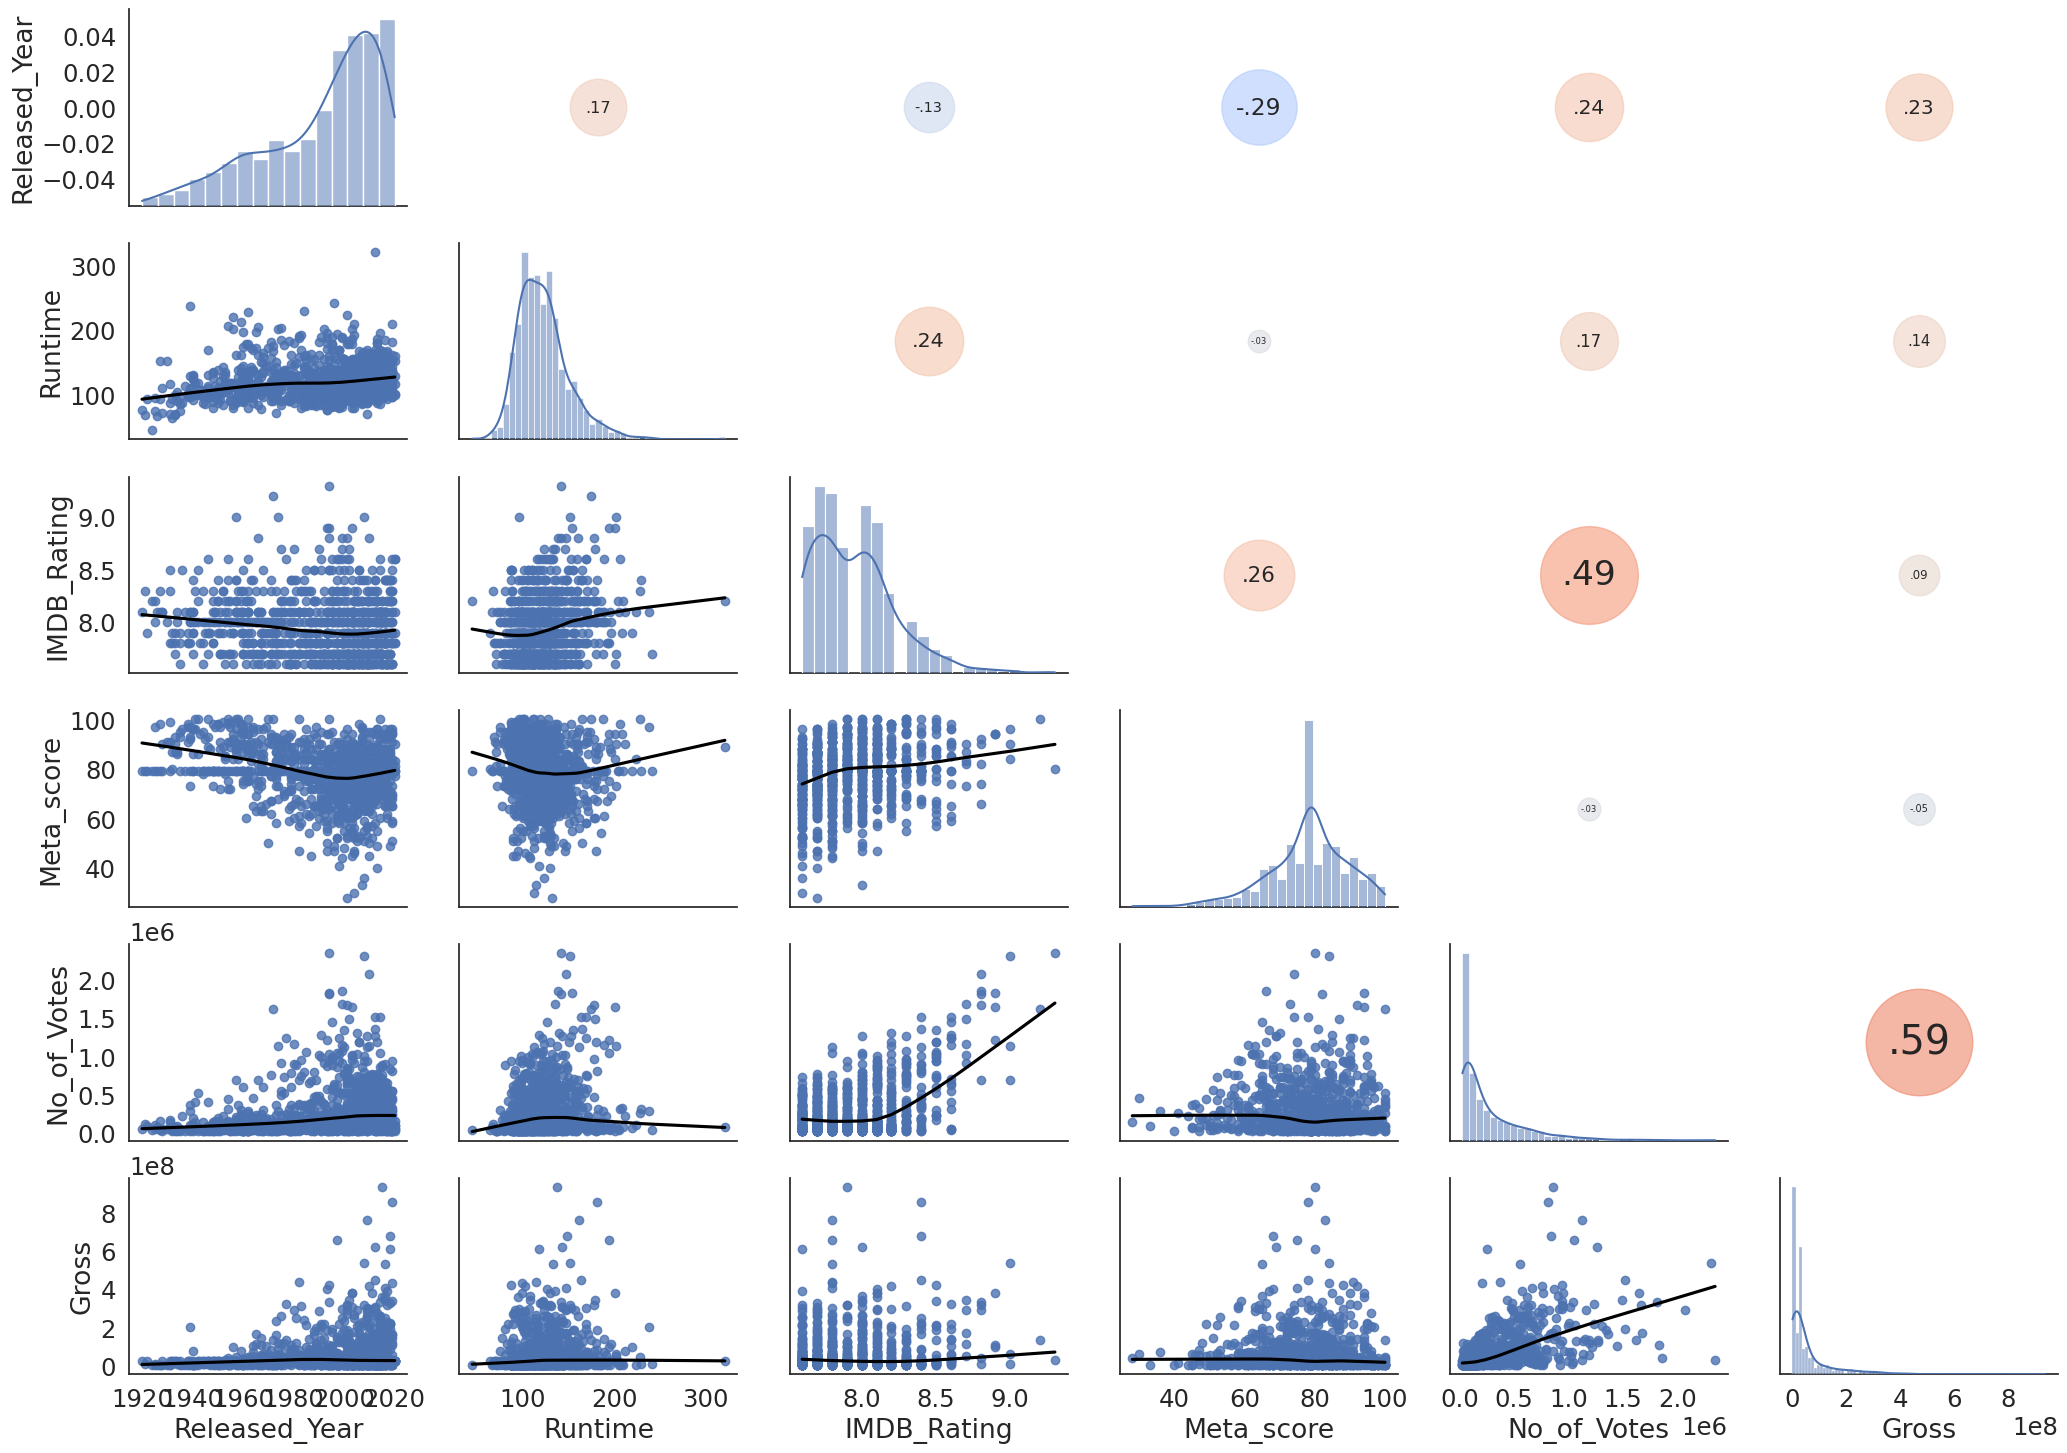

In [ ]:
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(data[['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']], aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde=True)
g.map_upper(corrdot)
sns.set(style='white', font_scale=1)

Temos aqui um boxplot para cada variável do nosso conjunto de dados. Utilizamos este tipo de visualização buscando identificar de forma eficaz a distribuição, a dispersão e a presença de valores atípicos em um conjunto de dados.

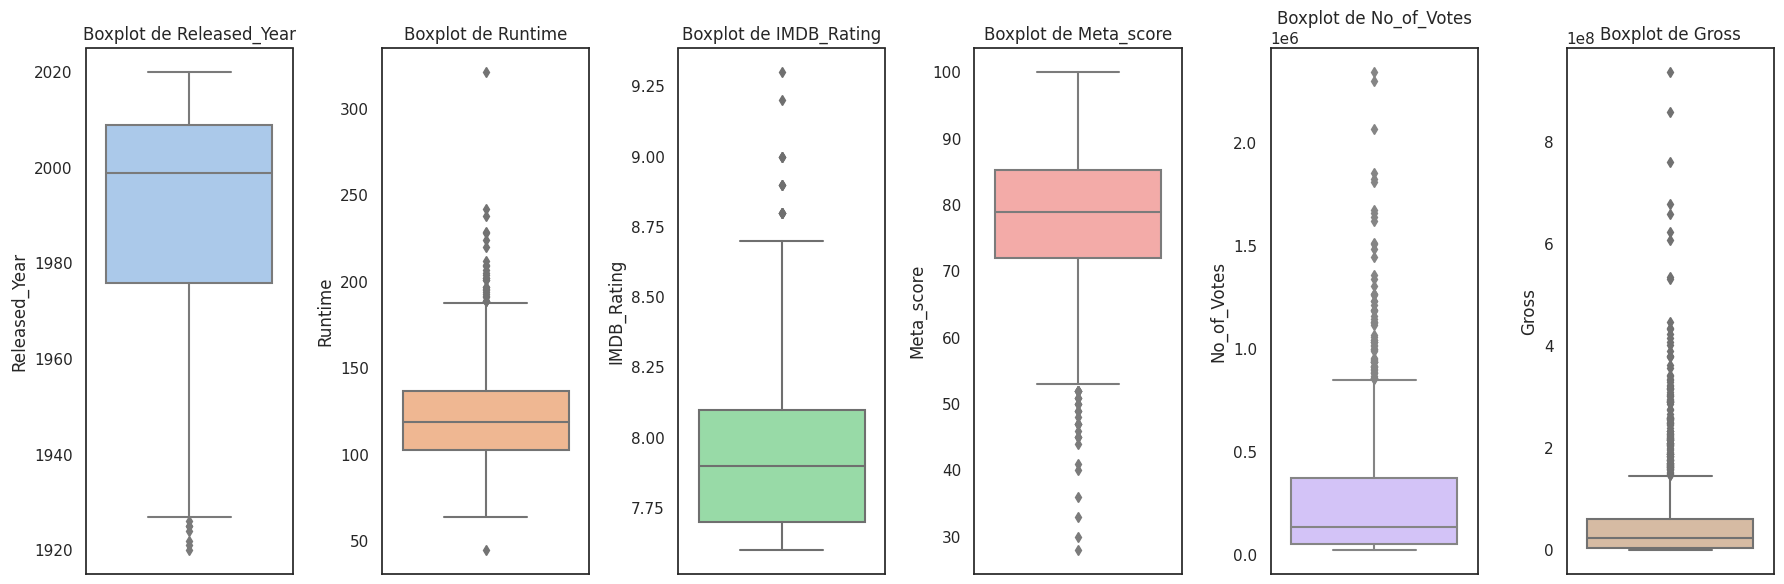

In [ ]:
# Selecione as colunas que você deseja incluir no boxplot
columns_to_plot = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

# Crie subplots para cada variável
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(18, 6))

# Crie boxplots separados para cada variável com cores diferentes
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=data, y=column, ax=axes[i], palette=sns.color_palette('pastel')[i:i+1])
    axes[i].set_title(f'Boxplot de {column}')
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

Aqui utilizamos um scatterplot com uma regressão linear para avaliar a relação entre o IMD rating e oa arrecadação de cada filme com o número de votos do mesmo, escolhemos após ver anteriormente uma possivel relação entre as variáveis e para ajudar a explorar, compreender e comunicar como essas duas variáveis estão interconectadas.

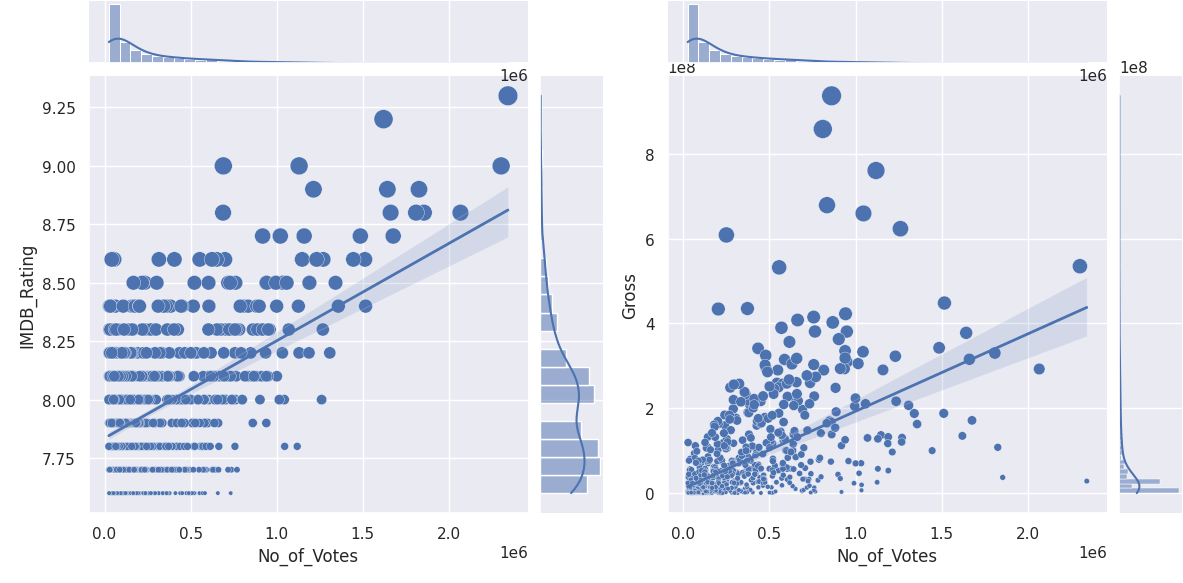

In [ ]:
# Primeiro gráfico: No_of_Votes vs IMDB_Rating
g0 = sns.JointGrid(x="No_of_Votes", y="IMDB_Rating", data=data)
g0.plot_joint(sns.scatterplot, sizes=(10, 200), size=data['IMDB_Rating'], legend=False)
g0.plot_marginals(sns.histplot, kde=True)
sns.regplot(x="No_of_Votes", y="IMDB_Rating", data=data, ax=g0.ax_joint, scatter=False, line_kws={"linewidth": 2})
g0.set_axis_labels('No_of_Votes', 'IMDB_Rating', fontsize=12)

# Segundo gráfico: No_of_Votes vs Gross
g1 = sns.JointGrid(x="No_of_Votes", y="Gross", data=data)
g1.plot_joint(sns.scatterplot, sizes=(10, 200), size=data['Gross'], legend=False)
g1.plot_marginals(sns.histplot, kde=True)
sns.regplot(x="No_of_Votes", y="Gross", data=data, ax=g1.ax_joint, scatter=False, line_kws={"linewidth": 2})
g1.set_axis_labels('No_of_Votes', 'Gross', fontsize=12)

fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(1, 2)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])

gs.tight_layout(fig)

plt.show()

Aqui utilizamos dois gráficos de barra, um para identificar os diretores que tem o maior número de filmes no top 1000 e outro vemos quais são os diretores que dirigiram os filmes com maior renda.

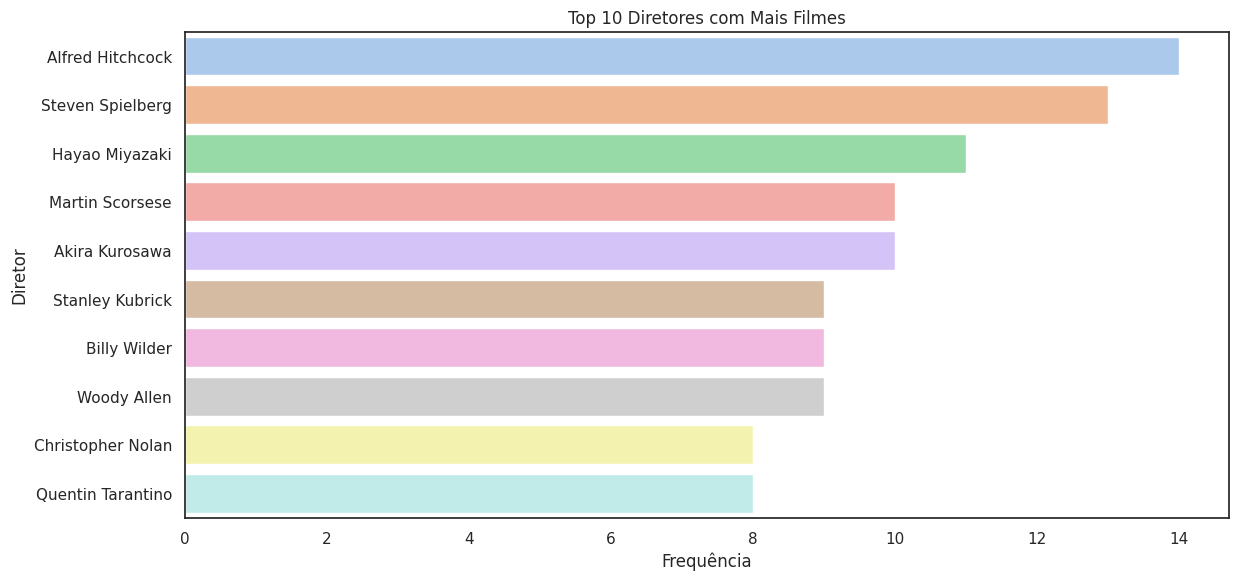

In [ ]:
# Contagem de frequência dos diretores
top_directors = data['Director'].value_counts().nlargest(10)

# Crie um countplot para os 10 principais diretores
plt.figure(figsize=(12, 6))
sns.barplot(y=top_directors.index, x=top_directors.values, palette='pastel')
plt.title('Top 10 Diretores com Mais Filmes')
plt.xlabel('Frequência')
plt.ylabel('Diretor')
plt.show()

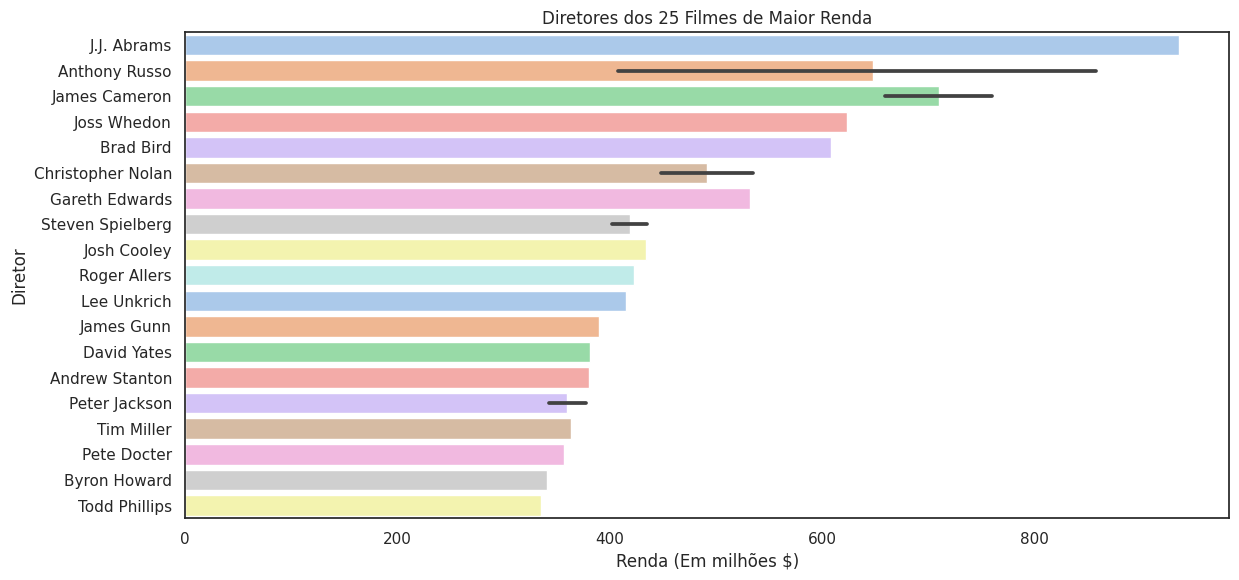

In [ ]:
# Ordenamos os filmes por renda
data_by_gross = data.sort_values(by='Gross', ascending=False)

# Ajusta renda para milhões de $
data_by_gross['Gross'] = data_by_gross['Gross'] / 10 ** 6

# Pegamos os 25 filmes de maior renda
data_by_gross_25 = data_by_gross.head(25)

# Cria gráfico de barras horizontal
plt.figure(figsize=(12, 6))
sns.barplot(x='Gross', y='Director', data=data_by_gross_25, palette='pastel')
plt.xlabel('Renda (Em milhões $)')
plt.ylabel('Diretor')
plt.title('Diretores dos 25 Filmes de Maior Renda')
plt.show()

Neste gráfico de barra vemos quais são os filmes com maior renda no período e destacamos os diretores que fazem mais de um desses filmes.

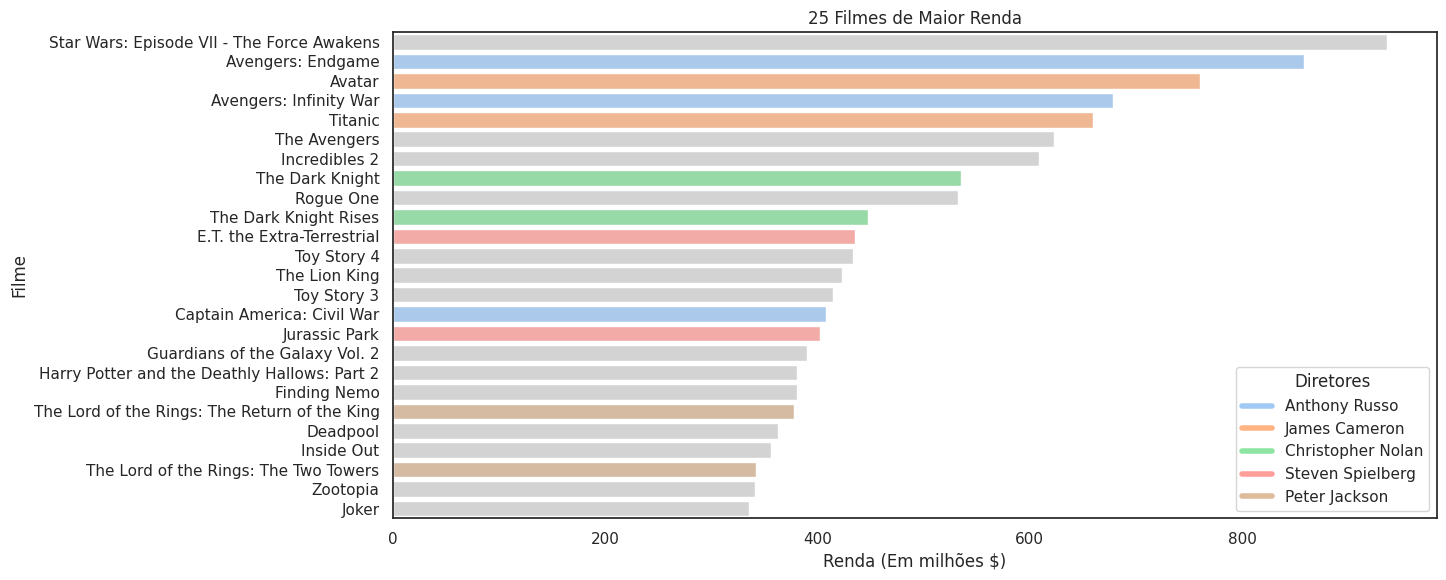

In [ ]:
# Dicionário que atribui cores para os diretores que aparecem com mais de um filme
diretores_cores = {
    'Anthony Russo': sns.color_palette('pastel')[0],
    'James Cameron': sns.color_palette('pastel')[1],
    'Christopher Nolan': sns.color_palette('pastel')[2],
    'Steven Spielberg': sns.color_palette('pastel')[3],
    'Peter Jackson': sns.color_palette('pastel')[5]
}

# Adicione as cores ao DataFrame
data_by_gross['Director_Color'] = data_by_gross['Director'].map(diretores_cores)

# Cria o gráfico de barras usando as cores
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Gross', y='Series_Title', data=data_by_gross_25,
                 palette=data_by_gross['Director_Color'].fillna('lightgrey'))
plt.xlabel('Renda (Em milhões $)')
plt.ylabel('Filme')
plt.title('25 Filmes de Maior Renda')
legend_labels = [plt.Line2D([0], [0], color=color, lw=4, label=director) for
                 director, color in diretores_cores.items()]
plt.legend(handles=legend_labels, title='Diretores')

plt.show()

Também utilizando o gráfico de barra vemos dividido por cada classe dos atores(Star1, Star2, Star3 e Star4) quais são os atores com a maior renda na classe em questão.

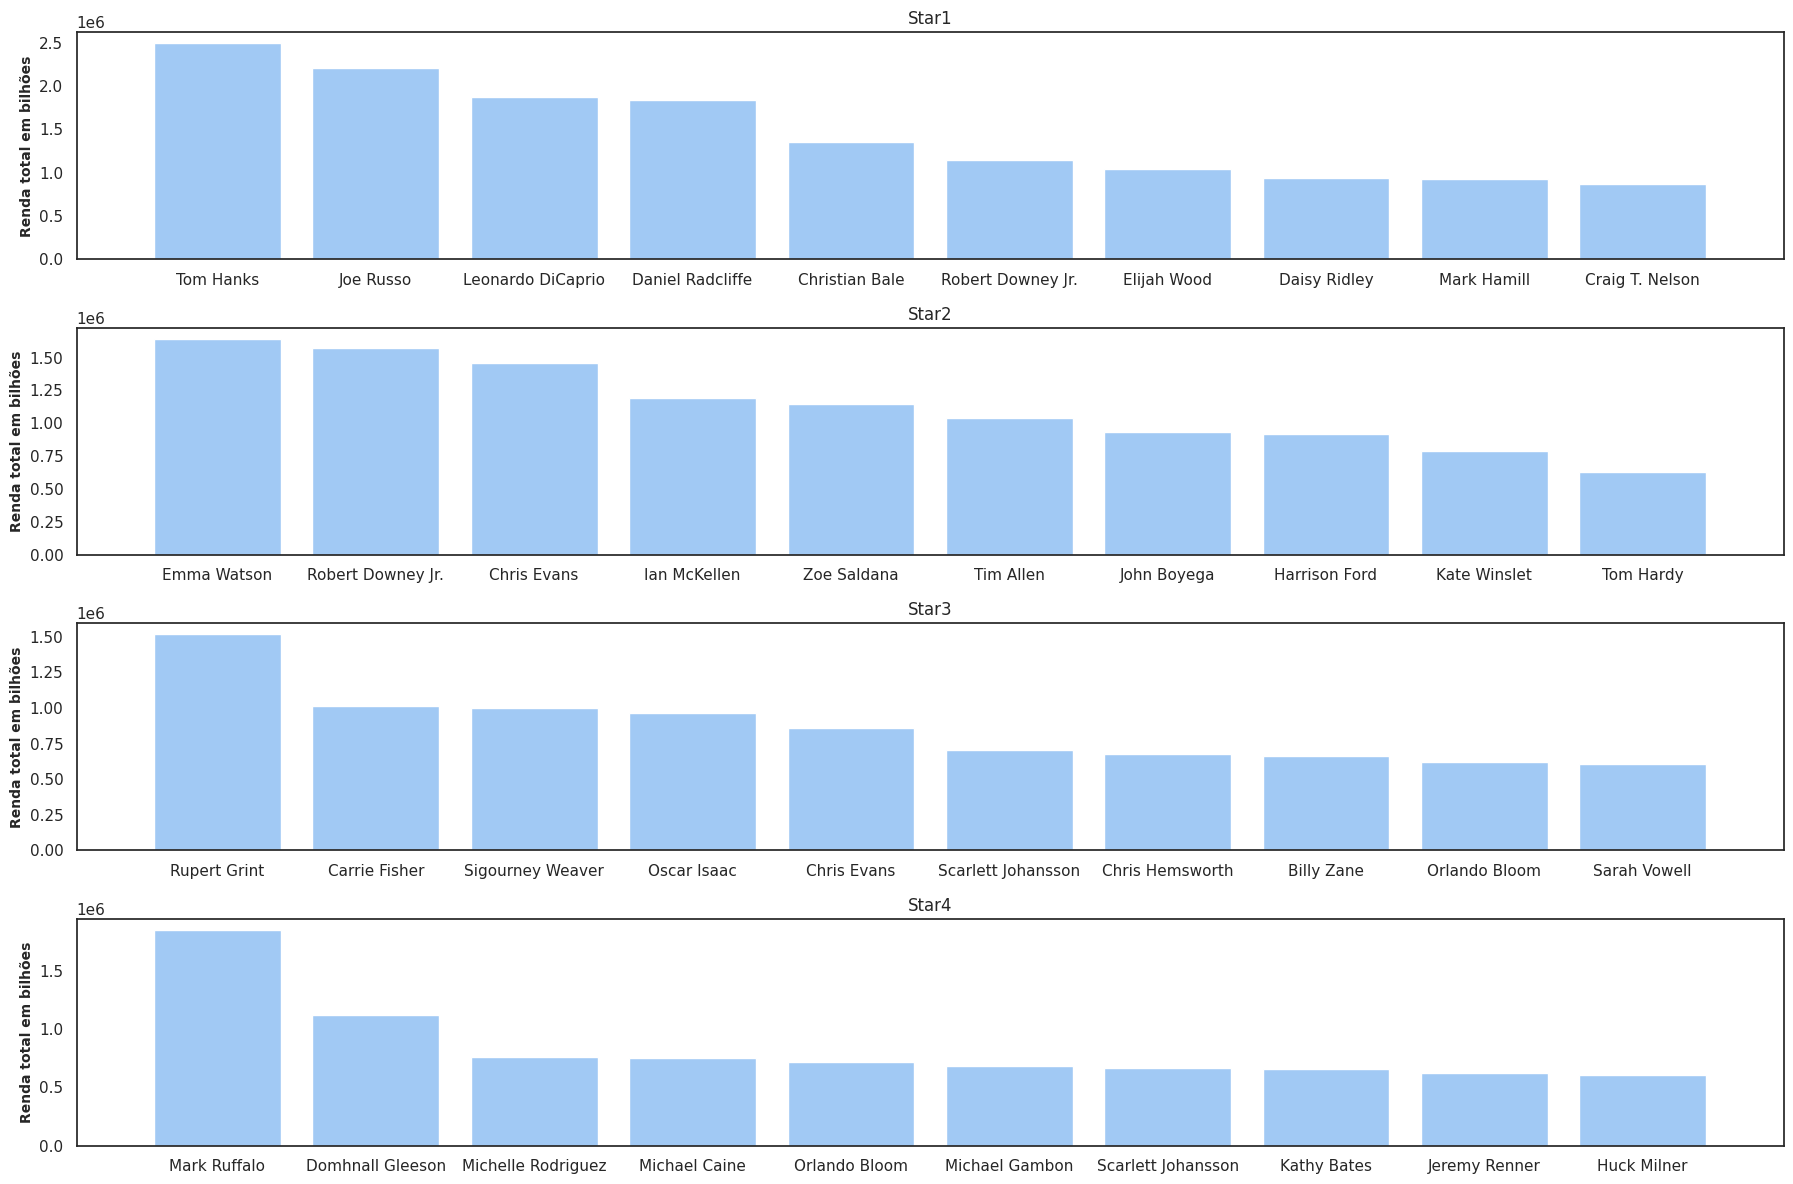

In [ ]:
# Define a paleta de cores para os gráficos
sns.set_palette('pastel')

# Lista das colunas de estrelas
stars = ['Star1', 'Star2', 'Star3', 'Star4']

# Cria uma figura com 4 subplots (um para cada estrela) e define o tamanho da figura
fig, axs = plt.subplots(4, 1, figsize=(18, 12))

# Inicializa a variável ax, que será usada para acessar os subplots
ax = 0

# Loop para criar gráficos para cada coluna de estrela
for x in stars:
    # Agrupa os dados pela coluna da estrela atual e calcula a soma dos valores numéricos
    s = data.groupby([x]).sum(numeric_only=True).reset_index()

    # Ordena os dados pelo valor da coluna 'Gross' em ordem decrescente e seleciona os 10 maiores
    d = s.sort_values(['Gross'], ascending=False)[:10]

    # Cria um gráfico de barras no subplot atual
    axs[ax].bar(d[x], d['Gross'] / 10 ** 3)

    # Define o título do subplot com o nome da estrela
    axs[ax].set_title(x)

    # Define o rótulo do eixo Y
    axs[ax].set_ylabel("Renda total em bilhões", weight="bold", fontsize=10)

    # Incrementa o valor de ax para acessar o próximo subplot
    ax += 1

# Ajusta automaticamente a disposição dos subplots para evitar sobreposições
plt.tight_layout()

# Exibe os gráficos
plt.show()


Utilizamos mais dois gráficos de barra, vendo quais os atores que participaram de mais filmes no período em questão e também qual tipo de classificação de filme teve maior frequência.

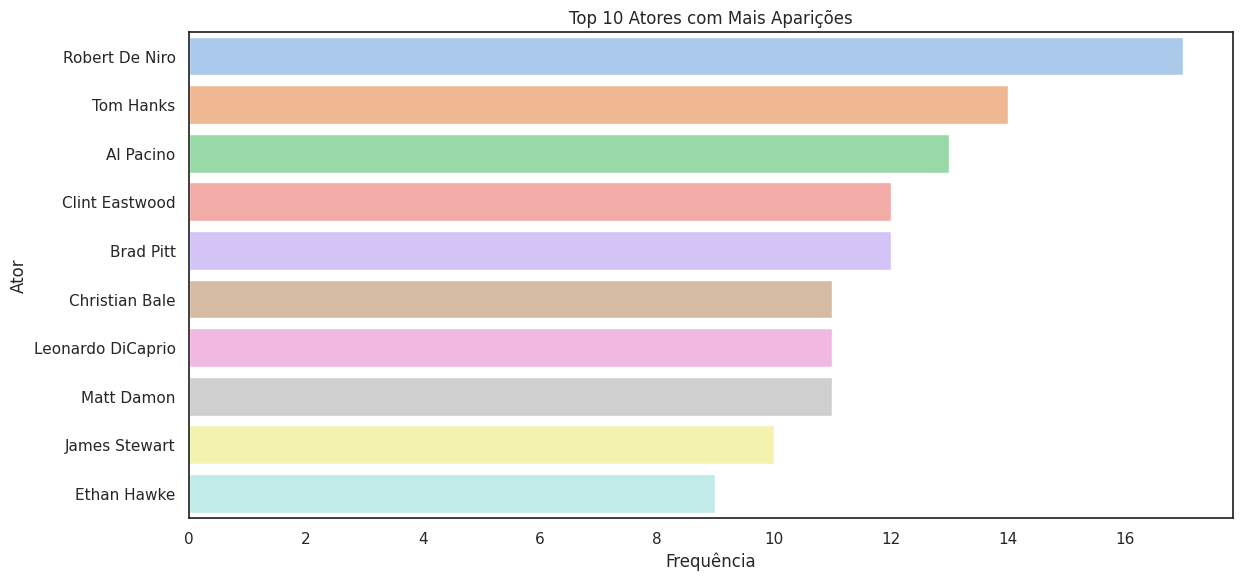

In [ ]:
# Combine as quatro colunas em uma única série de dados
stars = data[['Star1', 'Star2', 'Star3', 'Star4']].stack()

# Contagem de frequência dos atores
top_actors = stars.value_counts().nlargest(10)

# Crie um countplot para os 10 principais atores
plt.figure(figsize=(12, 6))
sns.barplot(y=top_actors.index, x=top_actors.values, palette='pastel')
plt.title('Top 10 Atores com Mais Aparições')
plt.xlabel('Frequência')
plt.ylabel('Ator')
plt.show()

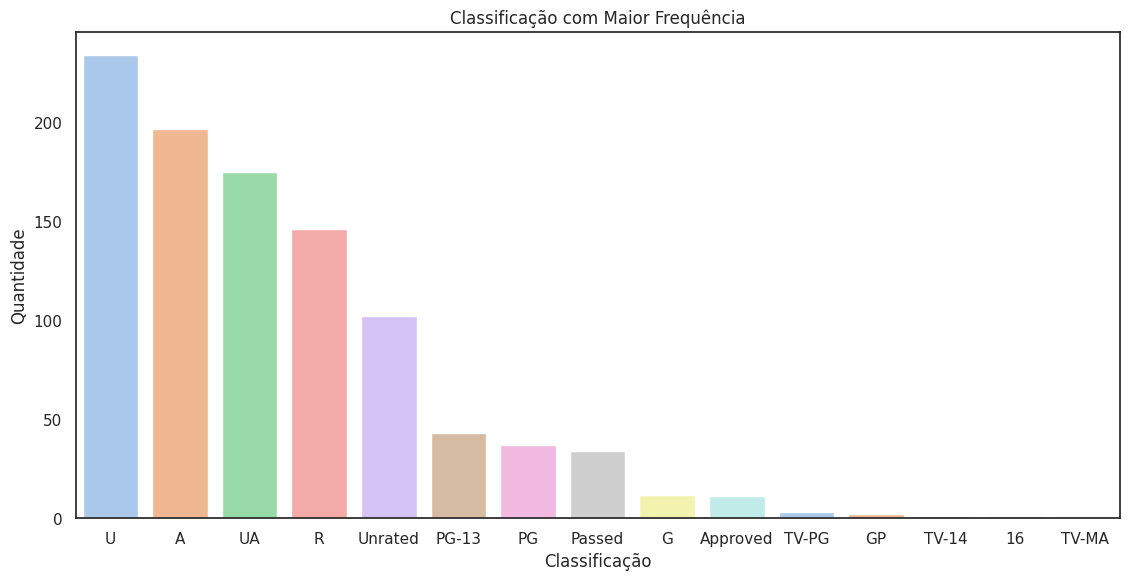

In [ ]:
# Crie um countplot para as classificações
plt.figure(figsize=(12, 6))
sns.countplot(x='Certificate', order = data['Certificate'].value_counts().index[0:-1],
              palette='pastel', data = data)
plt.title('Classificação com Maior Frequência')
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.show()

Agora, usamos um gráfico de barra junto com um gráfico de linha, onde as barras mostram a quantidade de filmes lançados em cada ano e a linha mostra qual foi a soma das rendas desses filmes neste mesmo ano.

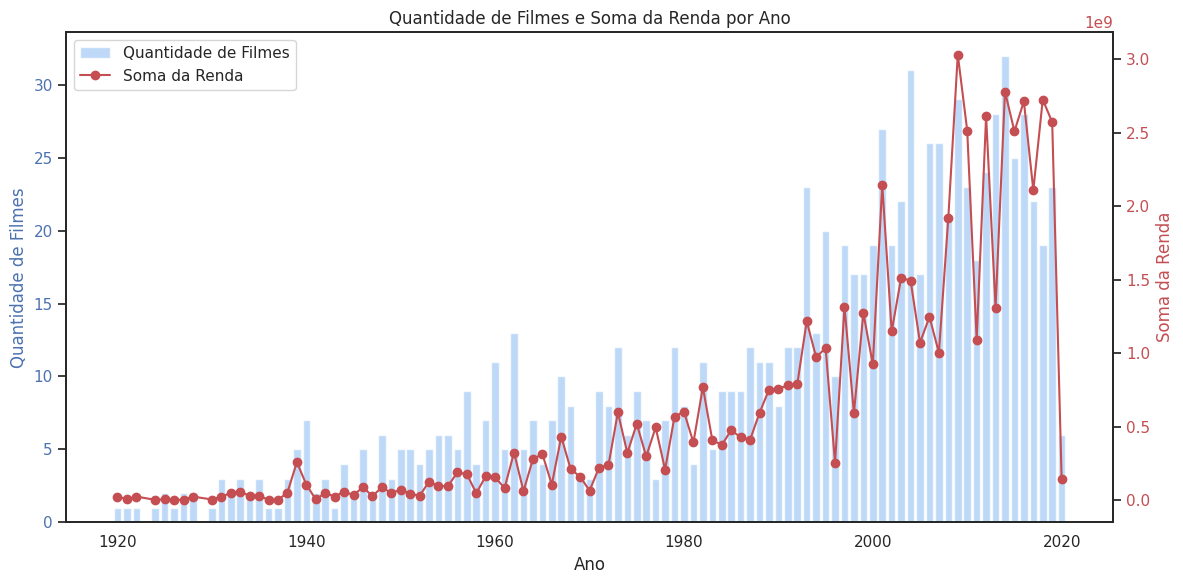

In [ ]:
# Agrupe os dados por ano e calcule a contagem de filmes e a soma da renda no ano
yearly_data = data.groupby('Released_Year').agg({'Series_Title': 'count', 'Gross': 'sum'}).reset_index()

# Crie uma figura com dois eixos y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para a quantidade de filmes por ano (eixo y esquerdo)
ax1.bar(yearly_data['Released_Year'], yearly_data['Series_Title'], alpha=0.7, label='Quantidade de Filmes')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Quantidade de Filmes', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crie um segundo eixo y para o gráfico de linhas da soma da renda no ano (eixo y direito)
ax2 = ax1.twinx()
ax2.plot(yearly_data['Released_Year'], yearly_data['Gross'], color='r', marker='o', label='Soma da Renda')
ax2.set_ylabel('Soma da Renda', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adicione legendas para ambos os eixos
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Título e rótulo do eixo x
plt.title('Quantidade de Filmes e Soma da Renda por Ano')
plt.xlabel('Ano')

plt.tight_layout()
plt.show()

Desta vez, fizemos 2 gráficos de linha com uma linha de tendência indicando como as médias das notas do IMDb e das rendas se comportaram ao longo dos anos.

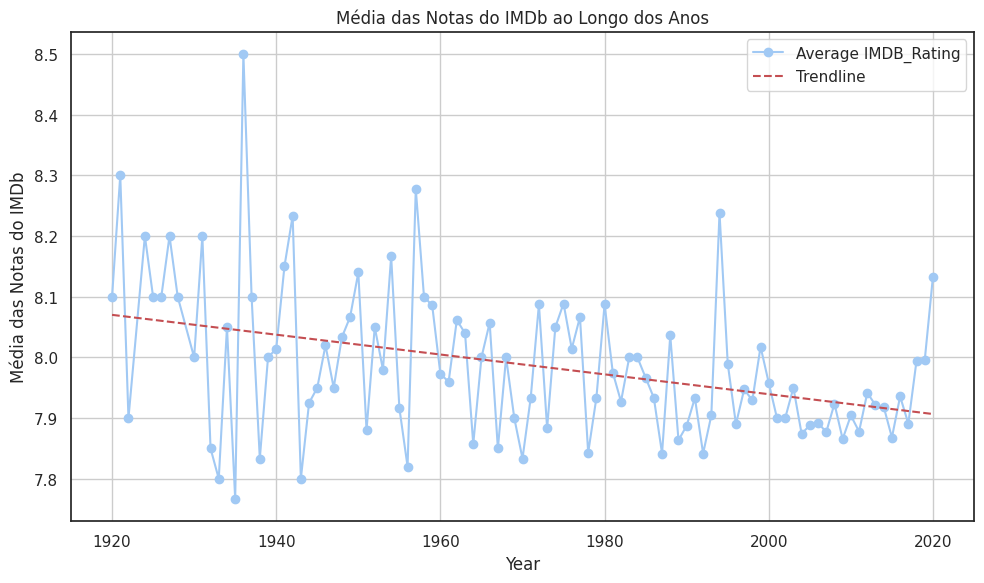

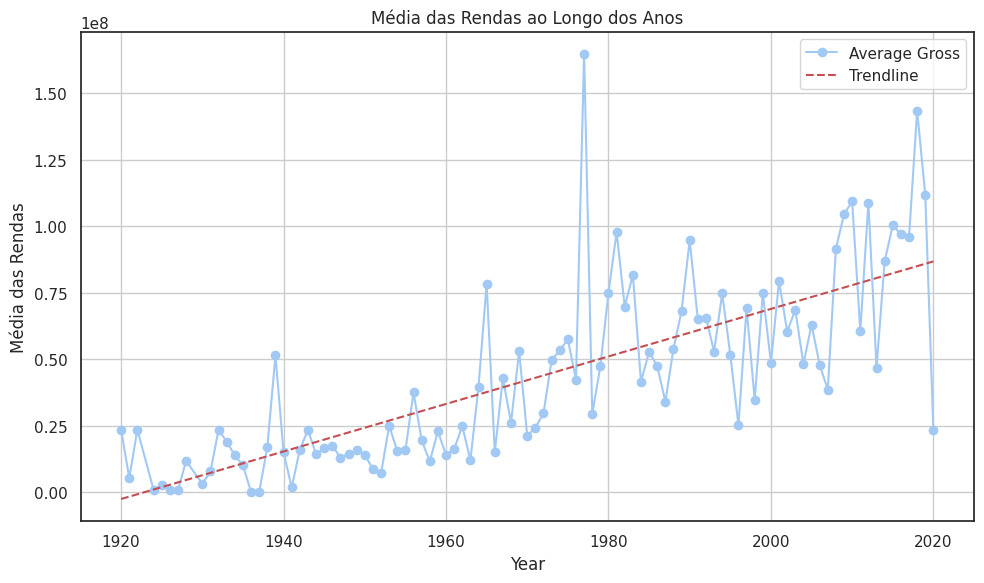

In [ ]:
# Chamar a função para 'IMDB_Rating'
plot_trend('IMDB_Rating', 'Média das Notas do IMDb', 'Média das Notas do IMDb ao Longo dos Anos')

# Chamar a função para 'Gross'
plot_trend('Gross', 'Média das Rendas', 'Média das Rendas ao Longo dos Anos')

Com um mapa de calor vemos a frequência de cada tipo de filme, dividido por gênero, em cada ano.

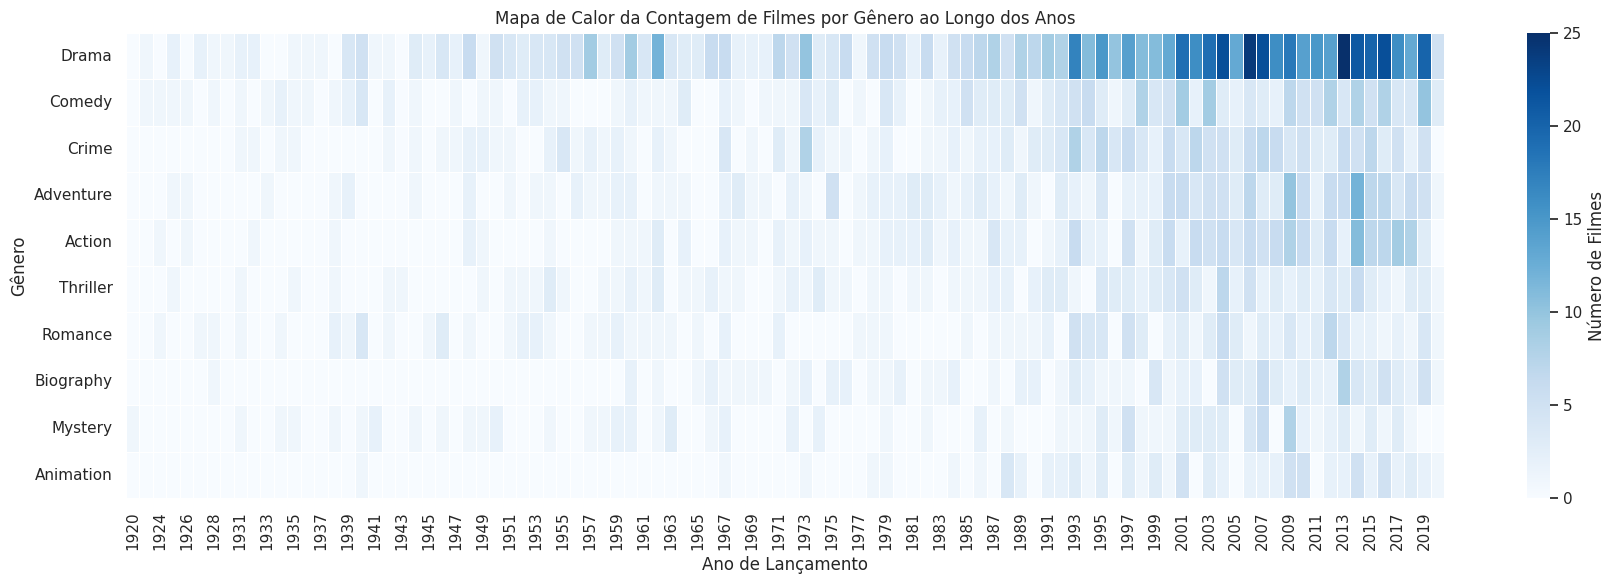

In [ ]:
# Dividir a coluna "Genres" e criar um novo DataFrame
split_data = data['Genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('New_Genre')

# Mesclar os dados divididos com o original
split_data = data.drop('Genre', axis=1).join(split_data)

# Calcular a soma total de filmes para cada gênero
genre_totals = split_data.groupby('New_Genre')['Series_Title'].count().reset_index(name='Total_Movies')
genre_totals = genre_totals.sort_values(by='Total_Movies', ascending=False)

# Filtrar o DataFrame split_data para incluir apenas os principais gêneros por contagem total de filmes
top_genres = genre_totals['New_Genre'][:10]  # Ajustar o número de principais gêneros conforme necessário
filtered_data = split_data[split_data['New_Genre'].isin(top_genres)]

# Criar uma tabela pivot para o mapa de calor com os eixos x e y trocados
heatmap_data = filtered_data.pivot_table(index='New_Genre', columns='Released_Year',
                                         values='Series_Title', aggfunc='count', fill_value=0)

# Ordenar os gêneros pelo número total de filmes e inverter a ordem
heatmap_data = heatmap_data.reindex(index=top_genres[::-1])

# Criar o mapa de calor com os eixos x e y trocados, sem números nas células e com uma barra de cores à direita
plt.figure(figsize=(18, 6))
sns.set(font_scale=1)

ax = sns.heatmap(heatmap_data, annot=False, cmap='Blues', fmt='g',
                 linewidths=0.5, cbar=True, cbar_kws={'label': 'Número de Filmes'})
ax.invert_yaxis()  # Inverter o eixo y para exibir o maior número de filmes no topo
plt.title('Mapa de Calor da Contagem de Filmes por Gênero ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

Para ver o comportamento dos filmes dividos por gênero, fizemos 3 gráficos de barra mostrando quais foram as frequências, médias das notas do IMDb e médias das rendas para cada tipo de filme.

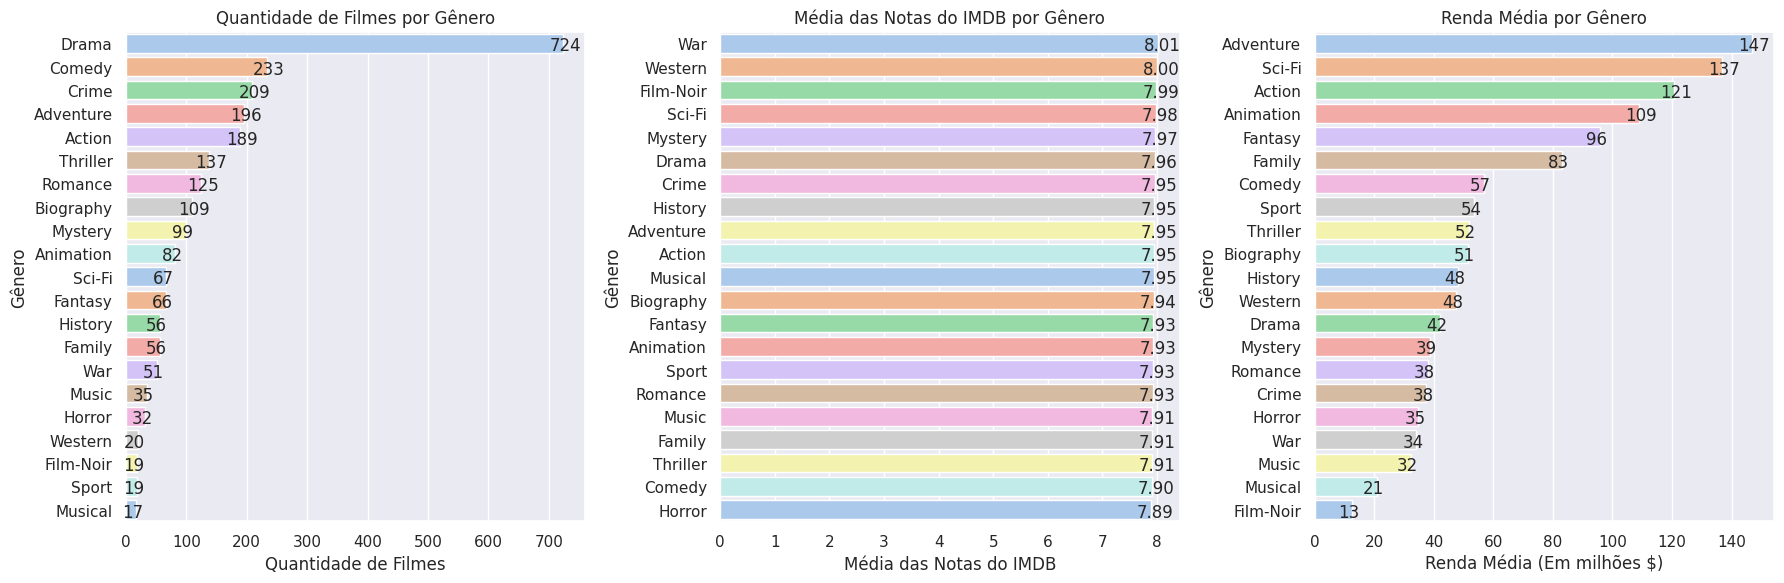

In [ ]:
# Cria uma figura com 1 linha e 3 subplots, definindo o tamanho da figura
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Calcula a contagem de gêneros de filmes e ordena em ordem decrescente
genre_counts = split_data_m['New_Genre'].str.split(', ').explode().value_counts().sort_values(ascending=False)

# Cria um gráfico de barras para a contagem de gêneros no primeiro subplot
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='pastel', ax=axs[0])
axs[0].set_title('Quantidade de Filmes por Gênero')  # Define o título do subplot
axs[0].set_xlabel('Quantidade de Filmes')  # Define o rótulo do eixo X
axs[0].set_ylabel('Gênero')  # Define o rótulo do eixo Y

# Adiciona anotações com a contagem ao lado das barras
for i, count in enumerate(genre_counts):
    axs[0].annotate(f'{count}', (count, i), textcoords="offset points", xytext=(-10, -5), ha='left')

# Calcula a média das notas do IMDb por gênero e ordena em ordem decrescente
genre_avg_ratings = split_data_m.groupby('New_Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

# Cria um gráfico de barras para a média das notas do IMDb no segundo subplot
sns.barplot(y=genre_avg_ratings.index, x=genre_avg_ratings.values, palette='pastel', ax=axs[1])
axs[1].set_title('Média das Notas do IMDB por Gênero')  # Define o título do subplot
axs[1].set_xlabel('Média das Notas do IMDB')  # Define o rótulo do eixo X
axs[1].set_ylabel('Gênero')  # Define o rótulo do eixo Y

# Adiciona anotações com a média das notas ao lado das barras
for i, rating in enumerate(genre_avg_ratings):
    axs[1].annotate(f'{rating:.2f}', (rating, i), textcoords="offset points", xytext=(-10, -5), ha='left')

# Calcula a média da renda por gênero e converte para milhões de dólares
genre_avg_gross = split_data_m.groupby('New_Genre')['Gross'].mean().sort_values(ascending=False) / 10**6

# Cria um gráfico de barras para a média da renda no terceiro subplot
sns.barplot(y=genre_avg_gross.index, x=genre_avg_gross.values, palette='pastel', ax=axs[2])
axs[2].set_title('Renda Média por Gênero')  # Define o título do subplot
axs[2].set_xlabel('Renda Média (Em milhões $)')  # Define o rótulo do eixo X
axs[2].set_ylabel('Gênero')  # Define o rótulo do eixo Y

# Adiciona anotações com a média da renda ao lado das barras
for i, gross in enumerate(genre_avg_gross):
    axs[2].annotate(f'{gross:.0f}', (gross, i), textcoords="offset points", xytext=(-10, -5), ha='left')

# Ajusta automaticamente a disposição dos subplots para evitar sobreposições
plt.tight_layout()

# Exibe os gráficos
plt.show()

Separando desta vez apenas os 25 filmes com melhor nota, vemos quais foram os gêneros mais presentes dentre estes.

<ipython-input-46-0ab1662e027e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_imdb_25['Genres'] = data_by_imdb_25['Genre'].str.split(', ')


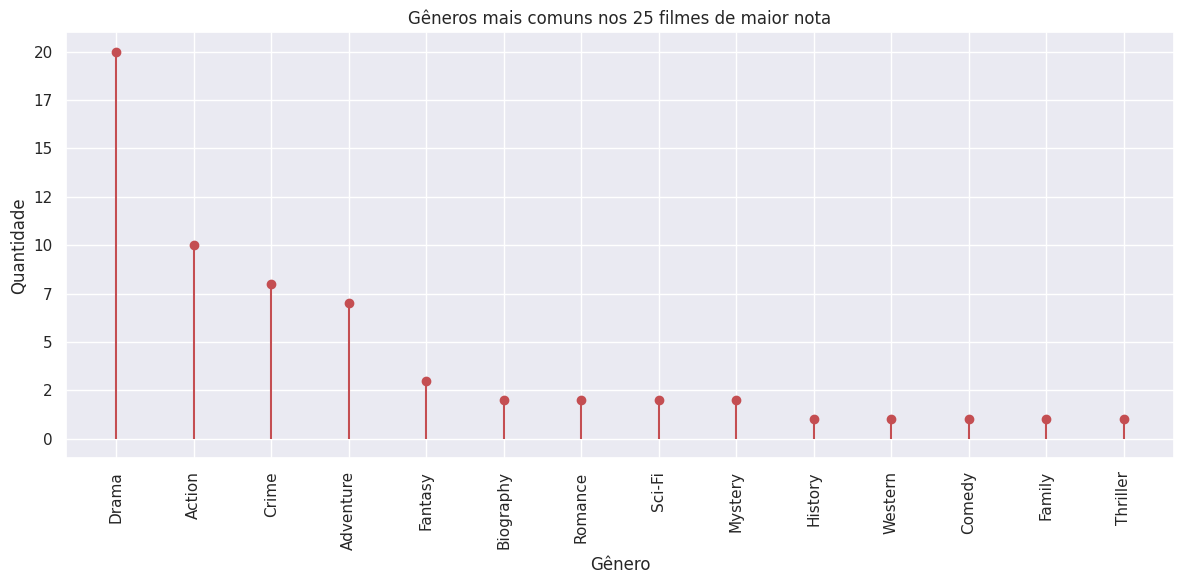

In [ ]:
# Pegamos os 25 filmes de maior nota
data_by_imdb = data.sort_values(by='IMDB_Rating', ascending=False)
data_by_imdb_25 = data_by_imdb.head(25)

data_by_imdb_25['Genres'] = data_by_imdb_25['Genre'].str.split(', ')

data_genres = data_by_imdb_25['Genres'].explode().value_counts()

# Grafico Lollipop
plt.figure(figsize=(12, 6))
plt.stem(data_genres.index, data_genres.values, markerfmt='ro', linefmt='r-', basefmt=' ')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.title('Gêneros mais comuns nos 25 filmes de maior nota')
plt.tight_layout()
plt.show()

Por último, vemos para cada diretor, por meio de um gráfico de barra e dois de linha, qual foi a soma total das suas rendas, a soma dos votos que ele recebeu e também sua média do IMDb.

In [ ]:
# Agrupe os dados por diretor e calcule a soma total da renda, o total de votos e a média do IMDb para cada diretor
director_data = data.groupby('Director').agg({'Gross': 'sum', 'No_of_Votes': 'sum', 'IMDB_Rating': 'mean'}).reset_index()
director_data = director_data.sort_values(by='Gross', ascending=False)[:50]

# Crie um gráfico de barras com Plotly para a soma total da renda
bar_trace = go.Bar(x=director_data['Director'], y=director_data['Gross'], name='Soma Total da Renda')

# Crie um gráfico de linhas com Plotly para o total de votos
line_trace = go.Scatter(x=director_data['Director'], y=director_data['No_of_Votes'],
                        name='Total de Votos', yaxis='y2', mode='lines')

# Crie um gráfico de linhas com Plotly para a média do IMDb
line_trace_imdb = go.Scatter(x=director_data['Director'], y=director_data['IMDB_Rating'],
                             name='Média do IMDb', yaxis='y2', mode='lines')

# Crie um subplot com dois eixos y (renda e votos) e um eixo y compartilhado (IMDb)
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(bar_trace)
fig.add_trace(line_trace)
fig.add_trace(line_trace_imdb)

# Personalize o layout do gráfico
fig.update_xaxes(categoryorder='total descending')
fig.update_traces(marker_color='royalblue', marker_line_width=1.5, opacity=0.7)

# Defina os rótulos dos eixos
fig.update_layout(
    title='Soma Total da Renda, Total de Votos e Média do IMDb por Diretor',
    xaxis=dict(title='Diretor'),
    yaxis=dict(title='Soma Total da Renda', rangemode='tozero'),
    yaxis2=dict(title='Total de Votos', overlaying='y', side='right', rangemode='tozero'),
)

# Rotacione os nomes no eixo x em 45 graus
fig.update_xaxes(tickangle=45)

# Exiba o gráfico
fig.show()

## **Conclusão**

Com base nas análises realizadas, destacam-se os seguintes insights que enriquecem nossa compreensão da indústria cinematográfica:


1. **Correlações Significativas**: Identificou que as variáveis com maior correlação foram o número de votos com a renda e o número de votos com o rating do IMDb, sugerindo que essas duas variáveis estão interligadas de alguma forma.

2. **Quantidade de Filmes vs. Renda**: Observou que, tanto para atores quanto para diretores, fazer muitos filmes não está necessariamente relacionado a uma maior renda. Alguns dos que fizeram mais filmes não estão entre os que têm maior renda.

3. **Tipos de Filmes Mais Frequentes**: Indicou que os tipos de filmes mais frequentemente feitos são aqueles para todos os públicos e adultos em geral, o que pode refletir as tendências da indústria cinematográfica.

4. **Tendência de Renda Anual**: Observamos uma tendência de aumento consistente na renda dos filmes a cada ano, indicando um crescimento geral na indústria cinematográfica que pode ser influenciado por fatores como inflação e alcance global. No entanto, é importante destacar que em 2020, essa média foi significativamente afetada devido à pandemia.

5. **Tendência de Notas do IMDb Anual**: Observou uma tendência de queda nas notas do IMDb ao longo dos anos, sugerindo uma possível mudança nas preferências do público ou na qualidade geral dos filmes.

6. **Gênero de Filme Mais Frequente**: Destacou que o gênero de filme que se destaca é o drama, com uma frequência que aumenta ao longo dos anos, indicando uma preferência duradoura pelo gênero.

7. **Gênero de Filme com Maior Renda**: Mencionou que, apesar do destaque do gênero drama em termos de frequência, os filmes de Aventura, Sci-Fi, Ação, Animação e Fantasia tendem a ter maior renda.

8. **Renda vs. Notas do IMDb para Diretores**: Observou que a renda obtida por um diretor não tem correlação forte com as notas do IMDb que eles recebem. Alguns diretores com menor renda têm notas mais altas do que diretores com renda mais alta.

9. **Renda vs. Votos para Diretores**: Constatou que os votos dos diretores têm uma correlação maior com a renda que eles obtêm, embora existam outliers. Isso sugere que, em geral, mais votos estão associados a maior renda, mas com algumas variações.

Esses insights fornecem uma visão abrangente das tendências e relações nos dados analisados e são úteis para compreender melhor a dinâmica da indústria cinematográfica.